In [1]:
import pandas as pd
import numpy as np

In [2]:
mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
mars_df[0].dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [4]:
mars_df[0].loc[:, 'terrestrial_date'] = pd.to_datetime(mars_df[0].loc[:, 'terrestrial_date'])

In [5]:
mars_df[0].dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [6]:
months = mars_df[0].loc[:, 'month'].unique()
len(months)

12

In [7]:
mars_df[0].loc[:, 'sol'].unique()

array([  10,   11,   12, ..., 1975, 1976, 1977], dtype=int64)

In [8]:
monthly_temp = mars_df[0].groupby(by='month').mean()['min_temp']
monthly_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [9]:
high_temp = mars_df[0].groupby(by='month').max()['min_temp']
high_temp

month
1    -62.0
2    -76.0
3    -77.0
4    -77.0
5    -74.0
6    -71.0
7    -65.0
8    -63.0
9    -63.0
10   -66.0
11   -67.0
12   -70.0
Name: min_temp, dtype: float64

In [10]:
low_temp = mars_df[0].groupby(by='month').min()['min_temp']
low_temp

month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64

In [11]:
import matplotlib.pyplot as plt

Coldest month on Mars is 3
Warmest month on Mars is 8


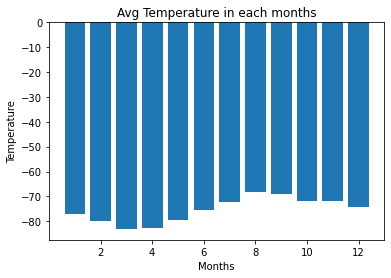

In [12]:
monthly_temp = mars_df[0].groupby(by='month').mean()['min_temp']

coldest = monthly_temp.idxmin()
print(f'Coldest month on Mars is {coldest}')
warmest = monthly_temp.idxmax()
print(f'Warmest month on Mars is {warmest}')
plt.bar(monthly_temp.index, monthly_temp)
plt.title('Avg Temperature in each months')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

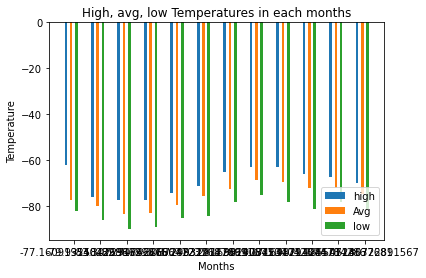

In [13]:
monthly_temp = mars_df[0].groupby(by='month').mean()['min_temp']
high_temp = mars_df[0].groupby(by='month').max()['min_temp']
low_temp = mars_df[0].groupby(by='month').min()['min_temp']

x_axis = np.arange(len(monthly_temp))
plt.bar(x_axis -0.3, high_temp, width=0.1, label = 'high')
plt.bar(x_axis -0.1, monthly_temp, width=0.1, label = 'Avg')
plt.bar(x_axis +0.1, low_temp, width=0.1, label = 'low')

plt.xticks(x_axis, monthly_temp)
plt.title('High, avg, low Temperatures in each months')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Lowest atmospheric pressure on Mars is 6
Warmest atmospheric pressure on Mars is 9


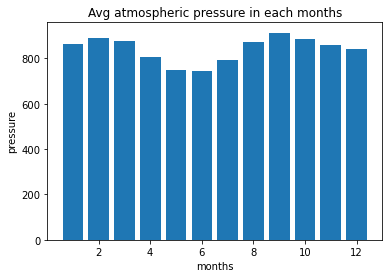

In [14]:
atm_pressure = mars_df[0].groupby(by='month').mean()['pressure']

low_pressure = atm_pressure.idxmin()
print(f'Lowest atmospheric pressure on Mars is {low_pressure}')
high_pressure = atm_pressure.idxmax()
print(f'Warmest atmospheric pressure on Mars is {high_pressure}')
plt.bar(atm_pressure.index, atm_pressure)
plt.title('Avg atmospheric pressure in each months')
plt.xlabel('months')
plt.ylabel('pressure')
plt.show()

In [15]:
mars_df[0].loc[:, 'terrestrial_date'] = pd.to_datetime(mars_df[0].loc[:, 'terrestrial_date'])
tdate = mars_df[0].loc[:, 'terrestrial_date']
tdate

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]